# DSE-301 Final Project
## Nirnay Roy(16128)

## Abstract

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data_file = 'AM_IM_SS_New_AM9.csv'
num_of_feature = 9
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [4]:
binary = np.zeros([163, num_of_feature+3])
ternary = np.zeros([120, num_of_feature+3])
quaternary = np.zeros([89, num_of_feature+3])
highorder = np.zeros([229, num_of_feature+3])

#iterator variable for each class
c2 = 0
c3 = 0
c4 = 0
c5 = 0
file = open(data_file, mode='r')
lines = file.readlines()
for i, l in enumerate(lines):
    data = l.split(',')
    print(data)
    if int(data[1]) == 2:
        for j, d in enumerate(data):
            if j >= 4 and j <= num_of_feature+3:
                binary[c2][j-4] = float(d)
            elif j >= num_of_feature+6 and j<= num_of_feature+8:
                binary[c2][j-6] = int(d)
        c2+=1
    elif int(data[1]) == 3:
        for j, d in enumerate(data):
            if j >= 4 and j <= num_of_feature+3:
                ternary[c3][j-4] = float(d)
            elif j >= num_of_feature+6 and j<= num_of_feature+8:
                ternary[c3][j-6] = int(d)
        c3+=1
    elif int(data[1]) == 4:
        for j, d in enumerate(data):
            if j >= 4 and j <= num_of_feature+3:
                quaternary[c4][j-4] = float(d)
            elif j >= num_of_feature+6 and j<= num_of_feature+8:
                quaternary[c4][j-6] = int(d)
        c4+=1
    else:
        for j, d in enumerate(data):
            if j >= 4 and j <= num_of_feature+3:
                highorder[c5][j-4] = float(d)
            elif j >= num_of_feature+6 and j<= num_of_feature+8:
                highorder[c5][j-6] = int(d)
        c5+=1

['AlB12', '2', 'Al B', '1 12', '0.867076923', '2239.19', '0', '2.006923077', '0.114581823', '3', '0', '3.01E+11', '65.01852262', 'IM', 'IM', '0', '1', '0', '2', '', '____', '', '\n']
['B4Co', '2', 'B Co ', '4 1', '0.9062', '2232', '3.456', '2.008', '0.064', '4.2', '2.4', '2.92E+11', '56', 'IM', 'IM', '0', '1', '0', '2', '', '____', '', '\n']
['AlB2', '2', 'Al B', '1 2', '1.024', '1876.49', '0', '1.896666667', '0.202703944', '3', '0', '2.39E+11', '115.0227031', 'IM', 'IM', '0', '1', '0', '2', '', '____', '', '\n']
['B6Co2Nb2', '3', 'B Co Nb', '6 2 2', '1.028', '2312.4', '8.138784184', '1.92', '0.171580885', '4.6', '2.332380758', '2.62E+11', '71.10555534', 'IM', 'IM', '0', '1', '0', '2', '', '____', '', '\n']
['HfB2', '2', 'Hf B', '1 2', '1.072666667', '2400.666667', '3.456966486', '1.793333333', '0.348839345', '3.333333333', '0.471404521', '2.50E+11', '98.99494937', 'IM', 'IM', '0', '1', '0', '2', '', '____', '', '\n']
['B2NiTa', '3', 'B Ni Ta', '2 1 1', '1.079', '2428.5', '9.380206887'

In [13]:
for n in range(0, 10):
    np.random.shuffle(binary)
    np.random.shuffle(ternary)
    np.random.shuffle(quaternary)
    np.random.shuffle(highorder)

In [5]:
train_data = np.concatenate((binary[:114], ternary[:84], quaternary[:62], highorder[:160]))
val_data = np.concatenate((binary[114:139], ternary[84:102], quaternary[62:76], highorder[160:194]))
test_data = np.concatenate((binary[139:], ternary[102:], quaternary[76:], highorder[194:]))
x_train = train_data[:, :num_of_feature]
y_train_AM = np.squeeze(train_data[:, num_of_feature: num_of_feature+1])
y_train_IM = np.squeeze(train_data[:, num_of_feature+1: num_of_feature+2])
y_train_SS = np.squeeze(train_data[:, num_of_feature+2: num_of_feature+3])
x_val = val_data[:, :num_of_feature]
y_val_AM = np.squeeze(val_data[:, num_of_feature: num_of_feature+1])
y_val_IM = np.squeeze(val_data[:, num_of_feature+1: num_of_feature+2])
y_val_SS = np.squeeze(val_data[:, num_of_feature+2: num_of_feature+3])
x_test = test_data[:, :num_of_feature]
y_test_AM = np.squeeze(test_data[:, num_of_feature: num_of_feature+1])
y_test_IM = np.squeeze(test_data[:, num_of_feature+1: num_of_feature+2])
y_test_SS = np.squeeze(test_data[:, num_of_feature+2: num_of_feature+3])

NameError: name 'data_pred' is not defined

In [8]:
np.save('data/x_train_' + str(num_of_feature) +'_revise', x_train)
np.save('data/y_train_AM_' + str(num_of_feature) +'_revise', y_train_AM)
np.save('data/y_train_IM_' + str(num_of_feature) +'_revise', y_train_IM)
np.save('data/y_train_SS_' + str(num_of_feature) +'_revise', y_train_SS)
np.save('data/x_val_' + str(num_of_feature) +'_revise', x_val)
np.save('data/y_val_AM_' + str(num_of_feature) +'_revise', y_val_AM)
np.save('data/y_val_IM_' + str(num_of_feature) +'_revise', y_val_IM)
np.save('data/y_val_SS_' + str(num_of_feature) +'_revise', y_val_SS)
np.save('data/x_test_' + str(num_of_feature) +'_revise', x_test)
np.save('data/y_test_AM_' + str(num_of_feature) +'_revise', y_test_AM)
np.save('data/y_test_IM_' + str(num_of_feature) +'_revise', y_test_IM)
np.save('data/y_test_SS_' + str(num_of_feature) +'_revise', y_test_SS)
#np.save('data/train_stat_' + str(num_of_feature) +'_revise', train_stat)
#np.save('data/for_pred' + str(num_of_feature) +'_revise', data_pred)

In [9]:
print(x_train.shape)

(420, 9)


In [10]:
df = pd.read_csv(data_file, encoding = "ISO-8859-1")

In [11]:

X_train = pd.DataFrame(data=x_train, columns=['a', 'Tm', 'åHmix', 'Elec_nega',
       'D_elec_nega', 'VEC', 'd_VEC', 'BulkModulus', 'D_Bulk'])
X_val = pd.DataFrame(data=x_val, columns=['a', 'Tm', 'åHmix', 'Elec_nega',
       'D_elec_nega', 'VEC', 'd_VEC', 'BulkModulus', 'D_Bulk'])
X_test = pd.DataFrame(data=x_test, columns=['a', 'Tm', 'åHmix', 'Elec_nega',
       'D_elec_nega', 'VEC', 'd_VEC', 'BulkModulus', 'D_Bulk'])

Y_train = pd.DataFrame(data=y_train_SS)
Y_val = pd.DataFrame(data=y_val_SS)
Y_test = pd.DataFrame(data=y_test_SS)

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_val = sc_x.transform(X_val)
X_test = sc_x.transform(X_test)



## Logistic Regression

In [12]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
y_pred, Y_test
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print(accuracy_score(Y_test, y_pred))


[[72  1]
 [ 6 11]]
0.9222222222222223


C:\Users\Nirnay\Anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## K-nearest Neighbor (KNN)

In [81]:
classifier = KNeighborsClassifier(n_neighbors = 4,
                                  weights='uniform') #wights='distance' gives 90% acc.
 giveclassifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
y_pred, Y_test
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print(accuracy_score(Y_test, y_pred))



[[54  7]
 [ 0 29]]
0.9222222222222223


In [83]:
classifier =SVC(kernel = 'rbf', random_state = 0) #rbf givees max. acc

classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
y_pred, Y_test
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print(accuracy_score(Y_test, y_pred))


[[51 10]
 [ 0 29]]
0.8888888888888888


In [85]:
classifier =GaussianNB()

classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
y_pred, Y_test
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print(accuracy_score(Y_test, y_pred))

[[42 19]
 [ 2 27]]
0.7666666666666667


In [89]:
classifier =DecisionTreeClassifier(criterion = 'gini', random_state = 0)#gini better than entropy

classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
y_pred, Y_test
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print(accuracy_score(Y_test, y_pred))

[[51 10]
 [ 5 24]]
0.8333333333333334


In [121]:
classifier = RandomForestClassifier(n_estimators = 18, random_state = 0)#accuracy peaks for more estimators

classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
y_pred, Y_test
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print(accuracy_score(Y_test, y_pred))

[[57  4]
 [ 1 28]]
0.9444444444444444


In [43]:
classifier = SGDClassifier(max_iter=1000, tol=1e-3)#accuracy peaks for more estimators

classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
y_pred, Y_test
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print(accuracy_score(Y_test, y_pred))

[[73  0]
 [ 6 11]]
0.9333333333333333


C:\Users\Nirnay\Anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

class Flatten(torch.nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)
    
num_of_feature = 11

In [60]:
model = torch.nn.Sequential(
    torch.nn.Conv1d(1, 64, 3, 1), #11
    torch.nn.LeakyReLU(),
    torch.nn.Conv1d(64, 128, 3, 1), #9
    torch.nn.LeakyReLU(),
    Flatten(),
    torch.nn.Dropout(),
    torch.nn.Linear(128*(num_of_feature-4), 2)
    torch.nn.Sigmoid()
#     torch.nn.Linear(128, 2)
#     torch.nn.Linear(576, 2)
    )

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

SyntaxError: invalid syntax (<ipython-input-60-7044938242b9>, line 9)

In [61]:
def train(batch, epoch, dataset):
    x_train = np.load('data/x_train_11.npy') #420
    x_val = np.load('data/x_val_11.npy')     #91
    x_test = np.load('data/x_test_11.npy')   #90
    y_train = np.load('data/y_train_' + dataset + '_11.npy')
    y_val = np.load('data/y_val_' + dataset + '_11.npy')
    y_test = np.load('data/y_test_' + dataset + '_11.npy')
    x_train = np.expand_dims(x_train, axis=1)
    x_val = np.expand_dims(x_val, axis=1)
    x_test = np.expand_dims(x_test, axis=1)
    data_pred = np.load('data/for_pred_11.npy')
    data_pred = np.expand_dims(data_pred, axis=1)
    indicies = np.arange(x_train.shape[0])
    epoch_loss = []
    epoch_accuracy = []
    val_accuracy = []
    test_accuracy = []
    IM_accuracy = []
    data_pred_labels = []
    for e in range(epoch):
        losses = []
        accuracies = []
        for i in range(0, int(np.ceil(x_train.shape[0]/batch))):
            start_idx = (i * batch) % x_train.shape[0]
            idx = indicies[start_idx: start_idx + batch]
            x_in = torch.from_numpy(x_train[idx]).type(torch.float32)
            y_in = torch.from_numpy(y_train[idx]).type(torch.long)
            y_score = model(x_in)
            predict = torch.argmax(y_score, 1)
            difference = predict == y_in
            accuracy = torch.mean(difference.type(torch.float32))
            loss = torch.nn.CrossEntropyLoss()
            loss = loss(y_score, y_in)
#             print('loss: ', loss.item(),' accuracy: ', accuracy.item())
            losses.append(loss.item())
            accuracies.append(accuracy.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print('epoch ', e, ' with loss: %.4f' %np.mean(losses), ' and accuracy: %.4f' %np.mean(accuracies))
        epoch_loss.append(np.mean(losses))
        epoch_accuracy.append(np.mean(accuracies))
        
        x_val_in = torch.from_numpy(x_val).type(torch.float32)
        y_val_in = torch.from_numpy(y_val).type(torch.long)
        y_val_score = model(x_val_in)
        val_predict = torch.argmax(y_val_score, 1) == y_val_in
        val_acc = torch.mean(val_predict.type(torch.float32))
        val_accuracy.append(val_acc.item())
        
        x_test_in = torch.from_numpy(x_test).type(torch.float32)
        y_test_in = torch.from_numpy(y_test).type(torch.long)
        y_test_score = model(x_test_in)
        test_predict = torch.argmax(y_test_score, 1) == y_test_in
        test_acc = torch.mean(test_predict.type(torch.float32))
        test_accuracy.append(test_acc.item())
        
        data_pred_in = torch.from_numpy(data_pred).type(torch.float32)
        data_pred_score = model(data_pred_in)
        data_pred_label = torch.argmax(data_pred_score, 1)
        data_pred_labels.append(data_pred_label)
        
        print('epoch ', e, ' with val_accuracy: %.4f' %val_acc.item(), ' and test_accuracy: %.4f' %test_acc.item())
    
    print('Highest val accuracy: %.4f' %np.max(val_accuracy), ' and test accuracy: %.4f' %np.max(test_accuracy))
    plt.xlabel('Loss')
    plt.plot(epoch_loss[10:])
    plt.grid(True)
    plt.show()
    plt.xlabel('Accuracy')
    plt.plot(epoch_accuracy)
    plt.grid(True)
    plt.show()
    return data_pred_labels

epoch  0  with loss: 0.0449  and accuracy: 0.9786
epoch  0  with val_accuracy: 0.9890  and test_accuracy: 0.9667
epoch  1  with loss: 0.0319  and accuracy: 0.9929
epoch  1  with val_accuracy: 0.9890  and test_accuracy: 0.9889
epoch  2  with loss: 0.0696  and accuracy: 0.9857
epoch  2  with val_accuracy: 0.9451  and test_accuracy: 0.9444
epoch  3  with loss: 0.0477  and accuracy: 0.9857
epoch  3  with val_accuracy: 0.9670  and test_accuracy: 0.9667
epoch  4  with loss: 0.0418  and accuracy: 0.9833
epoch  4  with val_accuracy: 0.9121  and test_accuracy: 0.9444
epoch  5  with loss: 0.0240  and accuracy: 0.9905
epoch  5  with val_accuracy: 0.9670  and test_accuracy: 0.9556
epoch  6  with loss: 0.0421  and accuracy: 0.9857
epoch  6  with val_accuracy: 0.9670  and test_accuracy: 0.9444
epoch  7  with loss: 0.0740  and accuracy: 0.9857
epoch  7  with val_accuracy: 0.9670  and test_accuracy: 0.9667
epoch  8  with loss: 0.0616  and accuracy: 0.9810
epoch  8  with val_accuracy: 0.9780  and test_

epoch  74  with loss: 0.0258  and accuracy: 0.9905
epoch  74  with val_accuracy: 0.9670  and test_accuracy: 0.9556
epoch  75  with loss: 0.0258  and accuracy: 0.9905
epoch  75  with val_accuracy: 1.0000  and test_accuracy: 0.9667
epoch  76  with loss: 0.0348  and accuracy: 0.9881
epoch  76  with val_accuracy: 0.9121  and test_accuracy: 0.9667
epoch  77  with loss: 0.0145  and accuracy: 0.9929
epoch  77  with val_accuracy: 0.9780  and test_accuracy: 0.9667
epoch  78  with loss: 0.0353  and accuracy: 0.9905
epoch  78  with val_accuracy: 0.9451  and test_accuracy: 0.9667
epoch  79  with loss: 0.0308  and accuracy: 0.9857
epoch  79  with val_accuracy: 0.9670  and test_accuracy: 0.9889
epoch  80  with loss: 0.0274  and accuracy: 0.9881
epoch  80  with val_accuracy: 0.9560  and test_accuracy: 0.9444
epoch  81  with loss: 0.0192  and accuracy: 0.9929
epoch  81  with val_accuracy: 0.9560  and test_accuracy: 0.9556
epoch  82  with loss: 0.0395  and accuracy: 0.9905
epoch  82  with val_accuracy:

epoch  146  with val_accuracy: 0.9451  and test_accuracy: 0.9444
epoch  147  with loss: 0.0325  and accuracy: 0.9881
epoch  147  with val_accuracy: 0.9670  and test_accuracy: 0.9889
epoch  148  with loss: 0.0249  and accuracy: 0.9905
epoch  148  with val_accuracy: 0.9560  and test_accuracy: 0.9778
epoch  149  with loss: 0.0172  and accuracy: 0.9905
epoch  149  with val_accuracy: 0.9780  and test_accuracy: 0.9556
epoch  150  with loss: 0.0382  and accuracy: 0.9857
epoch  150  with val_accuracy: 0.9670  and test_accuracy: 0.9556
epoch  151  with loss: 0.0519  and accuracy: 0.9881
epoch  151  with val_accuracy: 0.9670  and test_accuracy: 0.9333
epoch  152  with loss: 0.0500  and accuracy: 0.9810
epoch  152  with val_accuracy: 0.9341  and test_accuracy: 0.9556
epoch  153  with loss: 0.0216  and accuracy: 0.9952
epoch  153  with val_accuracy: 0.9560  and test_accuracy: 0.9667
epoch  154  with loss: 0.0321  and accuracy: 0.9952
epoch  154  with val_accuracy: 0.9231  and test_accuracy: 0.9667

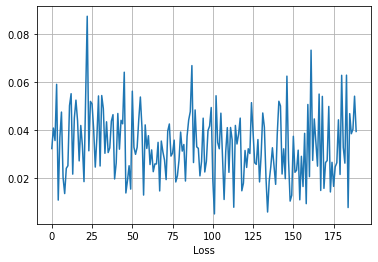

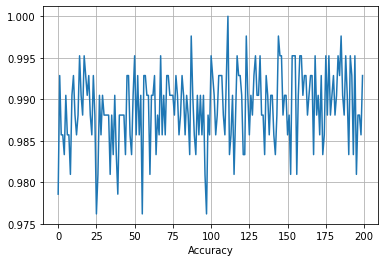

In [62]:
data_pred_labels = train(20, 200, 'SS')